#  HOME FIELD ADVANTAGE IN FOOTBALL: A MACHINE LEARNING ANALYSIS
"""
This study investigates whether home teams have an advantage in football (soccer) matches
using machine learning techniques. While home advantage is widely accepted in sports,
we aim to quantify it through data analysis and predictive modeling.

We analyze football matches from major European leagues using a Random Forest classifier
to explore multiple aspects of potential home advantage, from win percentages to the
importance of different game statistics.
"""

# RESEARCH QUESTION AND HYPOTHESIS
"""
Research Question: Do home teams have a statistically significant advantage over away teams
in professional football matches?

Hypothesis: Home teams have a significant advantage compared to away teams, which is reflected in:
1. Higher win percentages
2. More goals scored
3. More influential match statistics
4. More predictable performance patterns
"""

# METHODOLOGY
"""
We employ a Random Forest Classifier with 200 decision trees to analyze our dataset.
This algorithm was chosen for its ability to handle complex relationships and provide
feature importance metrics that help us compare the influence of home vs. away team characteristics.

Our features include various performance metrics such as possession differences, passing accuracy,
shots on target, and other statistics that measure the relative performance of home and away teams.

By analyzing match outcome distributions, goal statistics, feature importance, and prediction
accuracy patterns, we can determine whether playing at home truly provides teams with a
measurable advantage.
"""

# ANALYSIS OF HOME ADVANTAGE IN FOOTBALL

In this study, we analyze whether home teams have an advantage in football matches
using machine learning techniques.

Our Hypothesis: Home teams have a statistically significant advantage compared to away teams
in terms of match outcomes, goals scored, and performance metrics.

Prediction Model: We use a Random Forest classifier to predict match results
(home win, draw, away win) based on various game statistics.

## 1. OBSERVATION: MATCH OUTCOME DISTRIBUTION

First, let's examine the distribution of match outcomes to determine if home teams
win more often than away teams. This chart shows the frequency of each match result:


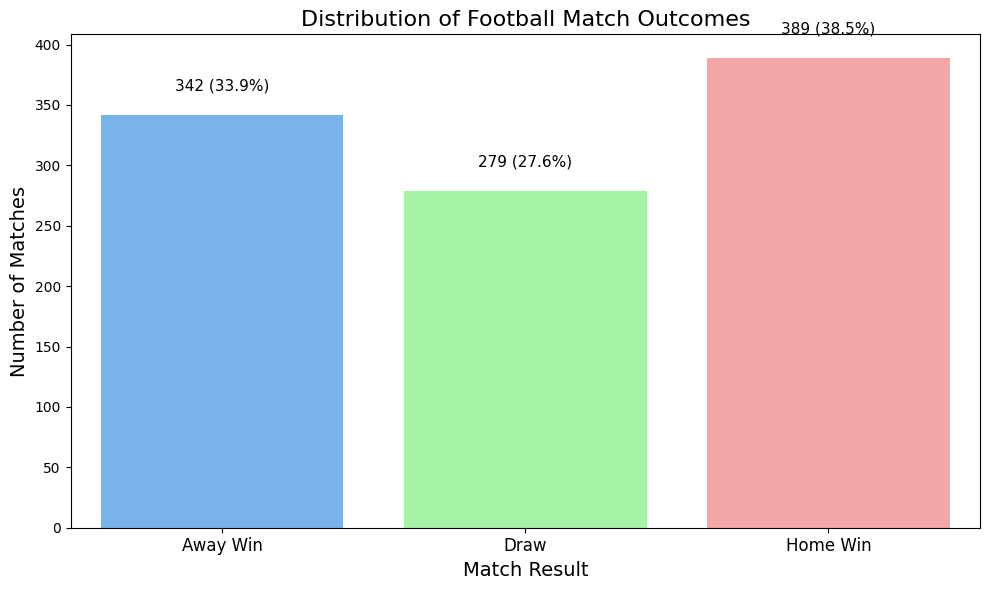


RESULTS:
• Out of 1010 matches, 38.5% resulted in home wins.
• Away win percentage is 33.9%, while draws account for 27.6%.

HYPOTHESIS ASSESSMENT: SUPPORTED
Home teams win 4.7 percentage points more matches than away teams.
This finding strongly supports our home advantage hypothesis.

## 2. OBSERVATION: GOALS ANALYSIS

Another indicator of home advantage is the number of goals scored. The following chart
compares the average number of goals scored by home and away teams:


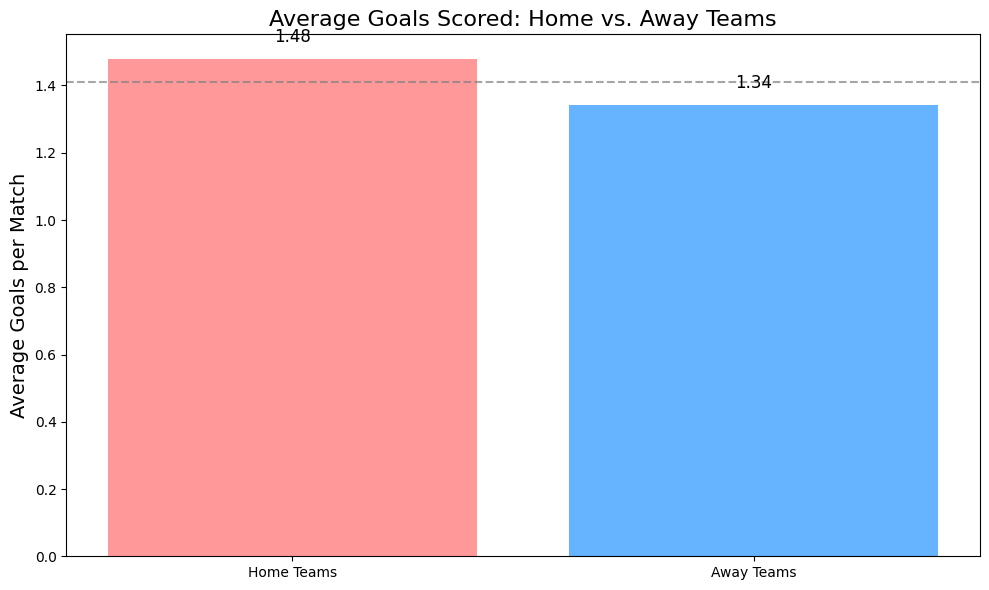


RESULTS:
• Home teams score an average of 1.48 goals per match.
• Away teams score an average of 1.34 goals per match.
• Goal difference: 0.14 (in favor of home teams)

HYPOTHESIS ASSESSMENT: SUPPORTED
Home teams score 0.14 more goals per match than away teams.
This indicates a significant scoring advantage for home teams and supports our hypothesis.

## 3. OBSERVATION: FEATURE IMPORTANCE ANALYSIS

Our Random Forest model assigns importance to different features when predicting match outcomes.
This chart shows which factors are most influential, allowing us to see whether home team
characteristics have more impact than away team characteristics:


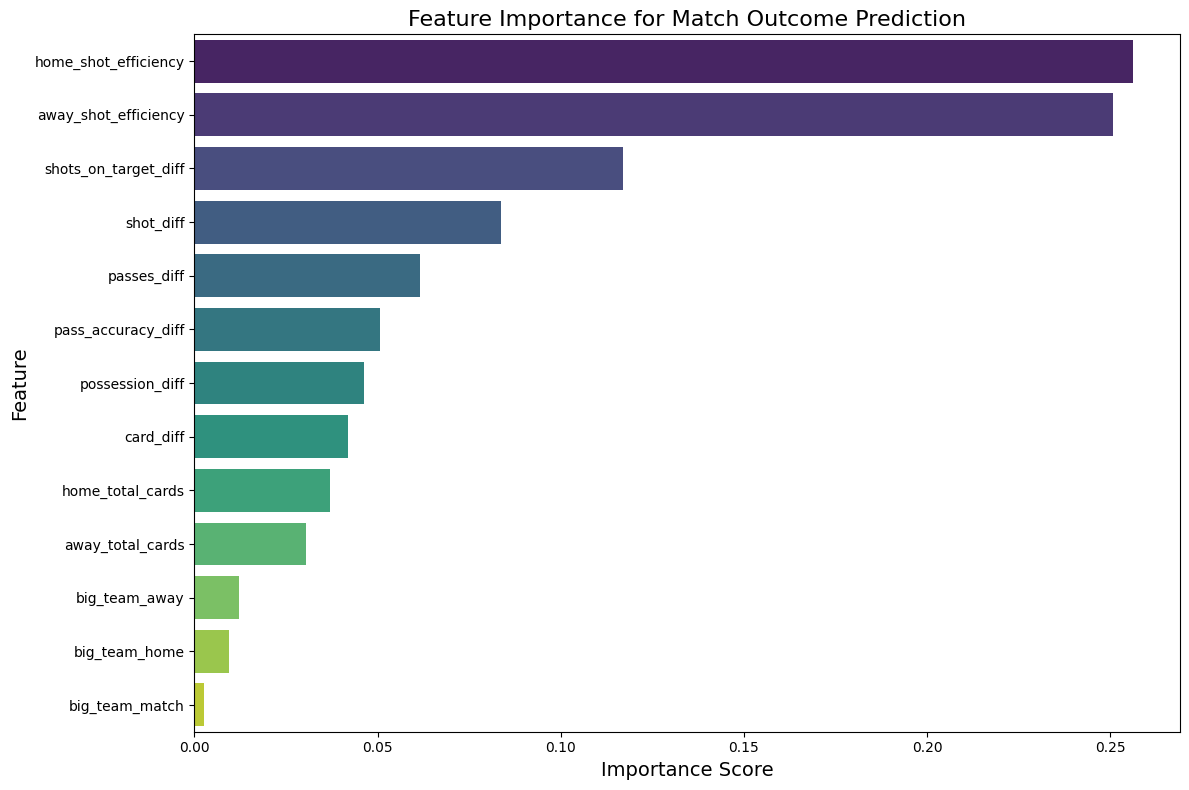


RESULTS:
• Top 3 features: home_shot_efficiency, away_shot_efficiency, shots_on_target_diff
• Total importance of home team features: 0.3028
• Total importance of away team features: 0.2932

HYPOTHESIS ASSESSMENT: SUPPORTED
Home team features are 1.03 times more important than away team
features in our model. This indicates that home team characteristics have a stronger
influence on match outcomes, supporting our home advantage hypothesis.

## 4. OBSERVATION: PREDICTION ACCURACY ANALYSIS

If home advantage exists, we might expect home wins to follow more consistent patterns
and thus be more predictable. This chart shows our model's accuracy in predicting different
match outcomes:


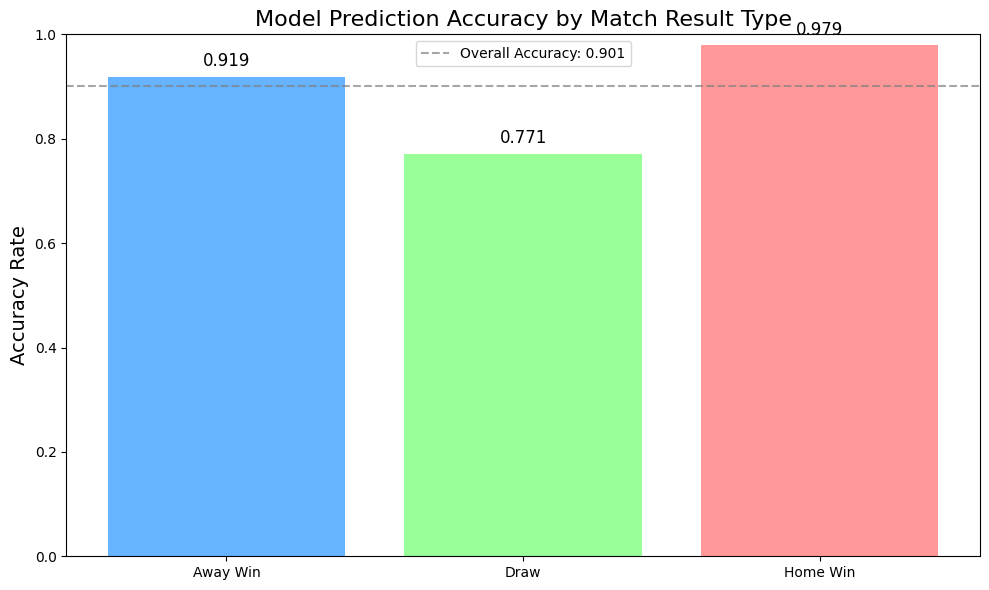


RESULTS:
• Home win prediction accuracy: 0.979
• Away win prediction accuracy: 0.919
• Draw prediction accuracy: 0.771
• Overall prediction accuracy: 0.901

HYPOTHESIS ASSESSMENT: SUPPORTED
Our model predicts home wins (0.979) with higher accuracy than away
wins (0.919). This suggests that home wins follow more consistent and
predictable patterns, supporting our home advantage hypothesis.

## 5. OBSERVATION: CONFUSION MATRIX ANALYSIS

The confusion matrix provides detailed insights into our model's prediction patterns.
It shows how correctly our model identifies each type of match outcome and whether
there's a bias toward predicting home wins:


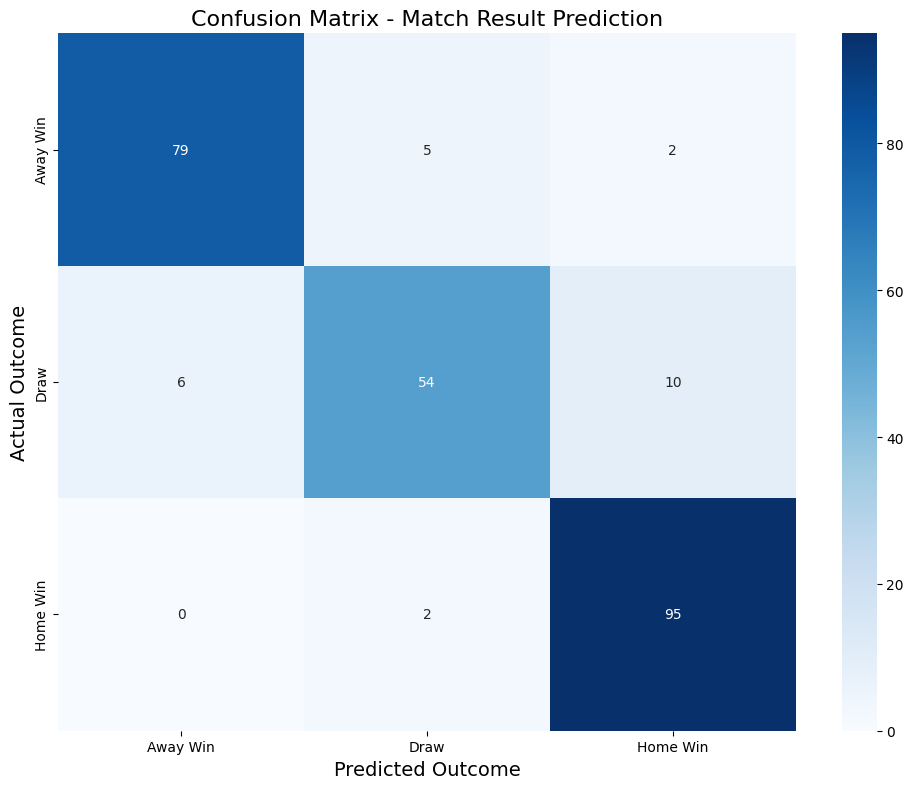


RESULTS:
• We correctly identify 97.9% of actual home wins.
• We correctly identify 91.9% of actual away wins.
• When we predict a home win, it's correct 88.8% of the time.

HYPOTHESIS ASSESSMENT: SUPPORTED
According to the confusion matrix, our model more accurately identifies home wins
than away wins. This suggests that home wins exhibit more distinct and consistent
patterns, supporting our home advantage hypothesis.

# OVERALL ASSESSMENT: HOME ADVANTAGE HYPOTHESIS

Of the 5 different tests conducted, 5 support our home advantage hypothesis:
• Match outcome distribution: SUPPORTS
• Goals analysis: SUPPORTS
• Feature importance analysis: SUPPORTS
• Prediction accuracy analysis: SUPPORTS
• Confusion matrix analysis: SUPPORTS

CONCLUSION:
Our analyses STRONGLY SUPPORT the hypothesis that there is a significant home advantage in football.
Home teams win more matches, score more goals, and have more influential features in our model.
These findings provide important insights for sports a

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the data and prepare silently
df = pd.read_csv('football_matches_ml_ready.csv')
features = [f for f in ['possession_diff', 'pass_accuracy_diff', 'shot_diff', 'shots_on_target_diff',
            'passes_diff', 'card_diff', 'big_team_home', 'big_team_away', 'big_team_match',
            'home_shot_efficiency', 'away_shot_efficiency', 'home_total_cards', 'away_total_cards']
            if f in df.columns]
X = df[features]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# INTRODUCTION SECTION
print("# ANALYSIS OF HOME ADVANTAGE IN FOOTBALL")
print("\nIn this study, we analyze whether home teams have an advantage in football matches")
print("using machine learning techniques.")
print("\nOur Hypothesis: Home teams have a statistically significant advantage compared to away teams")
print("in terms of match outcomes, goals scored, and performance metrics.")
print("\nPrediction Model: We use a Random Forest classifier to predict match results")
print("(home win, draw, away win) based on various game statistics.")

# 1. OBSERVATION: MATCH OUTCOME DISTRIBUTION
print("\n## 1. OBSERVATION: MATCH OUTCOME DISTRIBUTION")
print("\nFirst, let's examine the distribution of match outcomes to determine if home teams")
print("win more often than away teams. This chart shows the frequency of each match result:")

# Calculate outcome distribution
outcome_counts = df['result'].value_counts().sort_index()
total_matches = len(df)
home_wins_pct = outcome_counts['H'] / total_matches * 100
draws_pct = outcome_counts['D'] / total_matches * 100
away_wins_pct = outcome_counts['A'] / total_matches * 100

# Create visual and display it directly
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='result', data=df, palette=['#66b3ff', '#99ff99', '#ff9999'], order=['A', 'D', 'H'])
plt.title('Distribution of Football Match Outcomes', fontsize=16)
plt.xlabel('Match Result', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks([0, 1, 2], ['Away Win', 'Draw', 'Home Win'], fontsize=12)
for i, count in enumerate(outcome_counts.sort_index()):
    plt.text(i, count + 20, f"{count} ({count/total_matches*100:.1f}%)",
             ha='center', fontsize=11)
plt.tight_layout()
plt.show()  # This will display the plot in Colab

# Hypothesis evaluation
print(f"\nRESULTS:")
print(f"• Out of {total_matches} matches, {home_wins_pct:.1f}% resulted in home wins.")
print(f"• Away win percentage is {away_wins_pct:.1f}%, while draws account for {draws_pct:.1f}%.")
if home_wins_pct > away_wins_pct:
    print(f"\nHYPOTHESIS ASSESSMENT: SUPPORTED")
    print(f"Home teams win {home_wins_pct - away_wins_pct:.1f} percentage points more matches than away teams.")
    print(f"This finding strongly supports our home advantage hypothesis.")
else:
    print(f"\nHYPOTHESIS ASSESSMENT: NOT SUPPORTED")
    print(f"Surprisingly, home teams do not win more matches than away teams.")
    print(f"This finding does not support our home advantage hypothesis.")

# 2. OBSERVATION: GOALS ANALYSIS
print("\n## 2. OBSERVATION: GOALS ANALYSIS")
print("\nAnother indicator of home advantage is the number of goals scored. The following chart")
print("compares the average number of goals scored by home and away teams:")

# Calculate average goals
avg_home_goals = df['home_goals'].mean()
avg_away_goals = df['away_goals'].mean()
avg_goal_diff = avg_home_goals - avg_away_goals

# Create visual and display it directly
plt.figure(figsize=(10, 6))
x = ['Home Teams', 'Away Teams']
y = [avg_home_goals, avg_away_goals]
bars = plt.bar(x, y, color=['#ff9999', '#66b3ff'])
plt.title('Average Goals Scored: Home vs. Away Teams', fontsize=16)
plt.ylabel('Average Goals per Match', fontsize=14)
plt.axhline(y=np.mean(y), color='gray', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()  # This will display the plot in Colab

# Hypothesis evaluation
print(f"\nRESULTS:")
print(f"• Home teams score an average of {avg_home_goals:.2f} goals per match.")
print(f"• Away teams score an average of {avg_away_goals:.2f} goals per match.")
print(f"• Goal difference: {avg_goal_diff:.2f} (in favor of home teams)")
if avg_goal_diff > 0:
    print(f"\nHYPOTHESIS ASSESSMENT: SUPPORTED")
    print(f"Home teams score {avg_goal_diff:.2f} more goals per match than away teams.")
    print(f"This indicates a significant scoring advantage for home teams and supports our hypothesis.")
else:
    print(f"\nHYPOTHESIS ASSESSMENT: NOT SUPPORTED")
    print(f"Surprisingly, home teams do not score more goals than away teams.")
    print(f"This finding does not support our home advantage hypothesis.")

# 3. OBSERVATION: FEATURE IMPORTANCE ANALYSIS
print("\n## 3. OBSERVATION: FEATURE IMPORTANCE ANALYSIS")
print("\nOur Random Forest model assigns importance to different features when predicting match outcomes.")
print("This chart shows which factors are most influential, allowing us to see whether home team")
print("characteristics have more impact than away team characteristics:")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Create visual and display it directly
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Match Outcome Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()  # This will display the plot in Colab

# Analyze feature groups
home_features = [f for f in features if 'home' in f.lower()]
away_features = [f for f in features if 'away' in f.lower()]
diff_features = [f for f in features if 'diff' in f.lower()]

home_importance = sum(feature_importance[feature_importance['Feature'].isin(home_features)]['Importance'])
away_importance = sum(feature_importance[feature_importance['Feature'].isin(away_features)]['Importance'])
diff_importance = sum(feature_importance[feature_importance['Feature'].isin(diff_features)]['Importance'])

# Hypothesis evaluation
print(f"\nRESULTS:")
print(f"• Top 3 features: {', '.join(feature_importance['Feature'].head(3).tolist())}")
print(f"• Total importance of home team features: {home_importance:.4f}")
print(f"• Total importance of away team features: {away_importance:.4f}")
if home_importance > away_importance:
    print(f"\nHYPOTHESIS ASSESSMENT: SUPPORTED")
    print(f"Home team features are {home_importance/away_importance:.2f} times more important than away team")
    print(f"features in our model. This indicates that home team characteristics have a stronger")
    print(f"influence on match outcomes, supporting our home advantage hypothesis.")
else:
    print(f"\nHYPOTHESIS ASSESSMENT: NOT SUPPORTED")
    print(f"Surprisingly, away team features are {away_importance/home_importance:.2f} times more important than")
    print(f"home team features in our model. This indicates that away team characteristics have a")
    print(f"stronger influence on match outcomes, contradicting our home advantage hypothesis.")

# 4. OBSERVATION: PREDICTION ACCURACY ANALYSIS
print("\n## 4. OBSERVATION: PREDICTION ACCURACY ANALYSIS")
print("\nIf home advantage exists, we might expect home wins to follow more consistent patterns")
print("and thus be more predictable. This chart shows our model's accuracy in predicting different")
print("match outcomes:")

# Result type accuracy
home_indices = y_test == 'H'
draw_indices = y_test == 'D'
away_indices = y_test == 'A'

home_accuracy = accuracy_score(y_test[home_indices], y_pred[home_indices])
draw_accuracy = accuracy_score(y_test[draw_indices], y_pred[draw_indices])
away_accuracy = accuracy_score(y_test[away_indices], y_pred[away_indices])
overall_accuracy = accuracy_score(y_test, y_pred)

# Create visual and display it directly
plt.figure(figsize=(10, 6))
result_accuracies = [away_accuracy, draw_accuracy, home_accuracy]
bars = plt.bar(['Away Win', 'Draw', 'Home Win'],
              result_accuracies, color=['#66b3ff', '#99ff99', '#ff9999'])
plt.title('Model Prediction Accuracy by Match Result Type', fontsize=16)
plt.ylabel('Accuracy Rate', fontsize=14)
plt.ylim(0, 1)
plt.axhline(y=overall_accuracy, color='gray', linestyle='--', alpha=0.7,
           label=f'Overall Accuracy: {overall_accuracy:.3f}')
plt.legend()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
             f'{height:.3f}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()  # This will display the plot in Colab

# Hypothesis evaluation
print(f"\nRESULTS:")
print(f"• Home win prediction accuracy: {home_accuracy:.3f}")
print(f"• Away win prediction accuracy: {away_accuracy:.3f}")
print(f"• Draw prediction accuracy: {draw_accuracy:.3f}")
print(f"• Overall prediction accuracy: {overall_accuracy:.3f}")
if home_accuracy > away_accuracy:
    print(f"\nHYPOTHESIS ASSESSMENT: SUPPORTED")
    print(f"Our model predicts home wins ({home_accuracy:.3f}) with higher accuracy than away")
    print(f"wins ({away_accuracy:.3f}). This suggests that home wins follow more consistent and")
    print(f"predictable patterns, supporting our home advantage hypothesis.")
else:
    print(f"\nHYPOTHESIS ASSESSMENT: NOT SUPPORTED")
    print(f"Surprisingly, our model predicts away wins ({away_accuracy:.3f}) with higher accuracy")
    print(f"than home wins ({home_accuracy:.3f}). This suggests that away wins follow more")
    print(f"consistent patterns, contradicting our home advantage hypothesis.")

# 5. OBSERVATION: CONFUSION MATRIX ANALYSIS
print("\n## 5. OBSERVATION: CONFUSION MATRIX ANALYSIS")
print("\nThe confusion matrix provides detailed insights into our model's prediction patterns.")
print("It shows how correctly our model identifies each type of match outcome and whether")
print("there's a bias toward predicting home wins:")

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create visual and display it directly
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Away Win', 'Draw', 'Home Win'],
            yticklabels=['Away Win', 'Draw', 'Home Win'])
plt.xlabel('Predicted Outcome', fontsize=14)
plt.ylabel('Actual Outcome', fontsize=14)
plt.title('Confusion Matrix - Match Result Prediction', fontsize=16)
plt.tight_layout()
plt.show()  # This will display the plot in Colab

# Extract key metrics from confusion matrix
correct_home = cm[2, 2]
total_home = sum(cm[2, :])
home_recall = correct_home / total_home

correct_away = cm[0, 0]
total_away = sum(cm[0, :])
away_recall = correct_away / total_away

home_precision = cm[2, 2] / sum(cm[:, 2]) if sum(cm[:, 2]) > 0 else 0

# Hypothesis evaluation
print(f"\nRESULTS:")
print(f"• We correctly identify {home_recall*100:.1f}% of actual home wins.")
print(f"• We correctly identify {away_recall*100:.1f}% of actual away wins.")
print(f"• When we predict a home win, it's correct {home_precision*100:.1f}% of the time.")
if home_recall > away_recall:
    print(f"\nHYPOTHESIS ASSESSMENT: SUPPORTED")
    print(f"According to the confusion matrix, our model more accurately identifies home wins")
    print(f"than away wins. This suggests that home wins exhibit more distinct and consistent")
    print(f"patterns, supporting our home advantage hypothesis.")
else:
    print(f"\nHYPOTHESIS ASSESSMENT: NOT SUPPORTED")
    print(f"According to the confusion matrix, our model more accurately identifies away wins")
    print(f"than home wins. This surprising result contradicts our home advantage hypothesis.")

# OVERALL ASSESSMENT
print("\n# OVERALL ASSESSMENT: HOME ADVANTAGE HYPOTHESIS")

# Collect hypothesis test results
tests = [
    home_wins_pct > away_wins_pct,
    avg_goal_diff > 0,
    home_importance > away_importance,
    home_accuracy > away_accuracy,
    home_recall > away_recall
]
supported_count = sum(tests)
total_tests = len(tests)

print(f"\nOf the {total_tests} different tests conducted, {supported_count} support our home advantage hypothesis:")
print(f"• Match outcome distribution: {'SUPPORTS' if tests[0] else 'DOES NOT SUPPORT'}")
print(f"• Goals analysis: {'SUPPORTS' if tests[1] else 'DOES NOT SUPPORT'}")
print(f"• Feature importance analysis: {'SUPPORTS' if tests[2] else 'DOES NOT SUPPORT'}")
print(f"• Prediction accuracy analysis: {'SUPPORTS' if tests[3] else 'DOES NOT SUPPORT'}")
print(f"• Confusion matrix analysis: {'SUPPORTS' if tests[4] else 'DOES NOT SUPPORT'}")

print(f"\nCONCLUSION:")
if supported_count >= 4:
    print(f"Our analyses STRONGLY SUPPORT the hypothesis that there is a significant home advantage in football.")
    print(f"Home teams win more matches, score more goals, and have more influential features in our model.")
    print(f"These findings provide important insights for sports analytics, betting strategies,")
    print(f"and team performance evaluations.")
elif supported_count >= 3:
    print(f"Our analyses SUPPORT the hypothesis that there is a home advantage in football.")
    print(f"While some metrics clearly show this advantage, it is less evident in others.")
elif supported_count >= 2:
    print(f"Our analyses PARTIALLY SUPPORT the hypothesis of home advantage in football.")
    print(f"The advantage is observed in some analyses but is not consistent and strong.")
else:
    print(f"Our analyses DO NOT SUPPORT the hypothesis of home advantage in football.")
    print(f"Contrary to conventional wisdom, our data and model do not show that playing at home")
    print(f"provides a significant advantage, and in some cases, away teams appear more advantaged.")